In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/dataset_final.csv')

In [4]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,...,500m 16 days VI Quality,500m 16 days red reflectance,500m 16 days NIR reflectance,500m 16 days blue reflectance,500m 16 days MIR reflectance,500m 16 days view zenith angle,500m 16 days sun zenith angle,500m 16 days relative azimuth angle,500m 16 days composite day of the year,500m 16 days pixel reliability
0,43.5023,5.1921,300.1,1.0,1.0,2023-01-03,2113,Terra,MODIS,18,...,18453,2413,2611,3024,393,799,7515,-5869,355,2
1,43.4455,4.8910,314.6,1.1,1.0,2023-01-05,1301,Aqua,MODIS,57,...,18453,3150,3185,3826,300,799,7515,-5869,355,2
2,51.0455,2.3011,309.0,1.0,1.0,2023-01-10,208,Aqua,MODIS,76,...,4114,5568,5744,5806,3291,231,7469,-5539,2,3
3,43.4515,4.9015,301.3,1.4,1.2,2023-01-10,1001,Terra,MODIS,40,...,18453,3150,3185,3826,300,799,7515,-5869,355,2
4,51.0505,2.3189,302.3,1.0,1.0,2023-01-11,1040,Terra,MODIS,0,...,4114,5568,5744,5806,3291,231,7469,-5539,2,3


In [5]:
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type', 'temp', 'wind_speed',
       'description', 'humidity', '500m 16 days NDVI', '500m 16 days EVI',
       '500m 16 days VI Quality', '500m 16 days red reflectance',
       '500m 16 days NIR reflectance', '500m 16 days blue reflectance',
       '500m 16 days MIR reflectance', '500m 16 days view zenith angle',
       '500m 16 days sun zenith angle', '500m 16 days relative azimuth angle',
       '500m 16 days composite day of the year',
       '500m 16 days pixel reliability'],
      dtype='object')

In [6]:
valeurs_vides = df.isnull().sum()
print("Valeurs vides par colonne :")
print(valeurs_vides)

Valeurs vides par colonne :
latitude                                  0
longitude                                 0
brightness                                0
scan                                      0
track                                     0
acq_date                                  0
acq_time                                  0
satellite                                 0
instrument                                0
confidence                                0
version                                   0
bright_t31                                0
frp                                       0
daynight                                  0
type                                      0
temp                                      0
wind_speed                                0
description                               0
humidity                                  0
500m 16 days NDVI                         0
500m 16 days EVI                          0
500m 16 days VI Quality                   0
500m

In [7]:
df.dtypes

latitude                                  float64
longitude                                 float64
brightness                                float64
scan                                      float64
track                                     float64
acq_date                                   object
acq_time                                    int64
satellite                                  object
instrument                                 object
confidence                                  int64
version                                   float64
bright_t31                                float64
frp                                       float64
daynight                                   object
type                                        int64
temp                                      float64
wind_speed                                float64
description                                object
humidity                                    int64
500m 16 days NDVI                           int64


In [8]:
df.drop_duplicates(inplace=True)
print(df.head())

   latitude  longitude  brightness  scan  track    acq_date  acq_time  \
0   43.5023     5.1921       300.1   1.0    1.0  2023-01-03      2113   
1   43.4455     4.8910       314.6   1.1    1.0  2023-01-05      1301   
2   51.0455     2.3011       309.0   1.0    1.0  2023-01-10       208   
3   43.4515     4.9015       301.3   1.4    1.2  2023-01-10      1001   
4   51.0505     2.3189       302.3   1.0    1.0  2023-01-11      1040   

  satellite instrument  confidence  ...  500m 16 days VI Quality  \
0     Terra      MODIS          18  ...                    18453   
1      Aqua      MODIS          57  ...                    18453   
2      Aqua      MODIS          76  ...                     4114   
3     Terra      MODIS          40  ...                    18453   
4     Terra      MODIS           0  ...                     4114   

   500m 16 days red reflectance  500m 16 days NIR reflectance  \
0                          2413                          2611   
1                     

In [9]:
from datetime import datetime

df['drought_index'] = df['temp'] / (df['humidity'] + 1)

df['vegetation_health_index'] = df['500m 16 days NDVI']

df['acq_date'] = pd.to_datetime(df['acq_date'], format='%Y-%m-%d')
df['month'] = df['acq_date'].dt.month
df['season'] = df['month'] % 12 // 3 + 1

print(df[['drought_index', 'vegetation_health_index', 'month', 'season']].head())

   drought_index  vegetation_health_index  month  season
0       0.247191                      394      1       1
1       0.231579                       55      1       1
2       0.200000                      155      1       1
3       0.231579                       55      1       1
4       0.200000                      155      1       1


In [10]:
from sklearn.preprocessing import MinMaxScaler

continuous_columns = ['temp', 'wind_speed', 'humidity', 'drought_index', 'vegetation_health_index']


scaler = MinMaxScaler()

df[continuous_columns] = scaler.fit_transform(df[continuous_columns])

print(df[continuous_columns].head())

       temp  wind_speed  humidity  drought_index  vegetation_health_index
0  0.904412    0.170032  0.733333       0.574963                 0.453246
1  0.904412    0.170032  0.866667       0.515576                 0.322257
2  0.522059    0.422168  0.622222       0.395454                 0.360896
3  0.904412    0.170032  0.866667       0.515576                 0.322257
4  0.522059    0.422168  0.622222       0.395454                 0.360896


In [11]:
brightness_threshold = 300
confidence_threshold = 50
frp_threshold = 0

df['fire_occurrence'] = ((df['brightness'] > brightness_threshold) &
                       (df['confidence'] > confidence_threshold) &
                       (df['frp'] > frp_threshold))

print(df[['latitude', 'longitude', 'brightness', 'confidence', 'frp', 'fire_occurrence']])

     latitude  longitude  brightness  confidence   frp  fire_occurrence
0     43.5023     5.1921       300.1          18   8.1            False
1     43.4455     4.8910       314.6          57  15.2             True
2     51.0455     2.3011       309.0          76  13.2             True
3     43.4515     4.9015       301.3          40  11.1            False
4     51.0505     2.3189       302.3           0   8.3            False
..        ...        ...         ...         ...   ...              ...
882   48.7339     2.7911       312.2          41   6.8            False
883   47.8212     3.5816       318.2          55   9.1             True
884   47.7185     1.5118       315.3          64   7.6             True
885   44.7233    -0.8140       311.9          18   7.9            False
886   45.6781     4.9262       324.5          69  17.1             True

[887 rows x 6 columns]


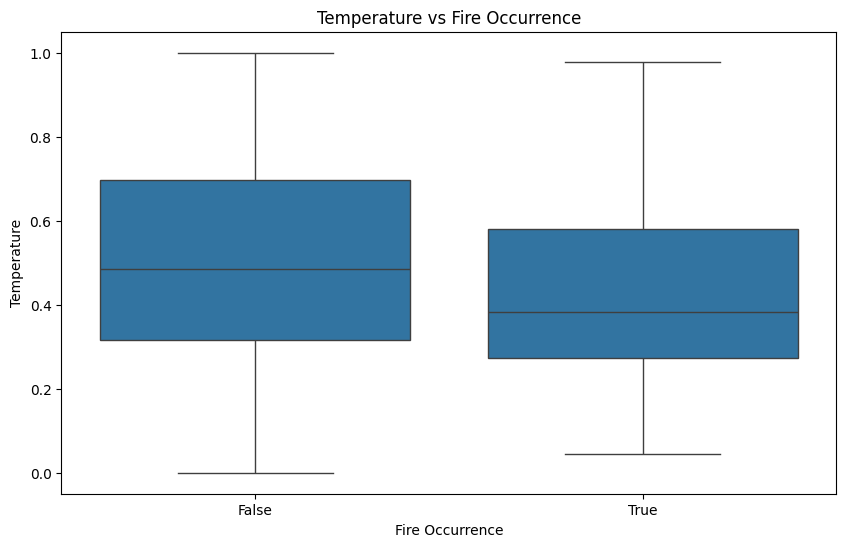

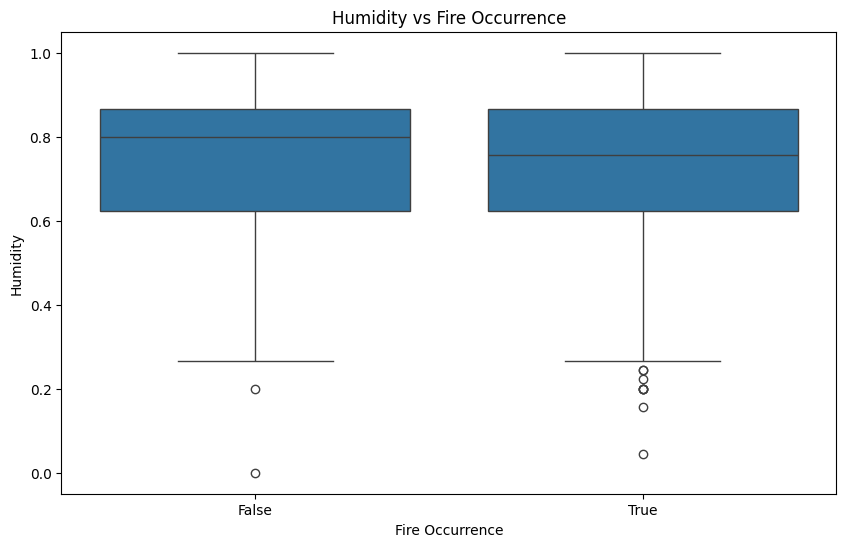

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='fire_occurrence', y='temp', data=df)
plt.title('Temperature vs Fire Occurrence')
plt.xlabel('Fire Occurrence')
plt.ylabel('Temperature')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='fire_occurrence', y='humidity', data=df)
plt.title('Humidity vs Fire Occurrence')
plt.xlabel('Fire Occurrence')
plt.ylabel('Humidity')
plt.show()

In [13]:
df['fire_occurrence'] = df['fire_occurrence'].astype(int)

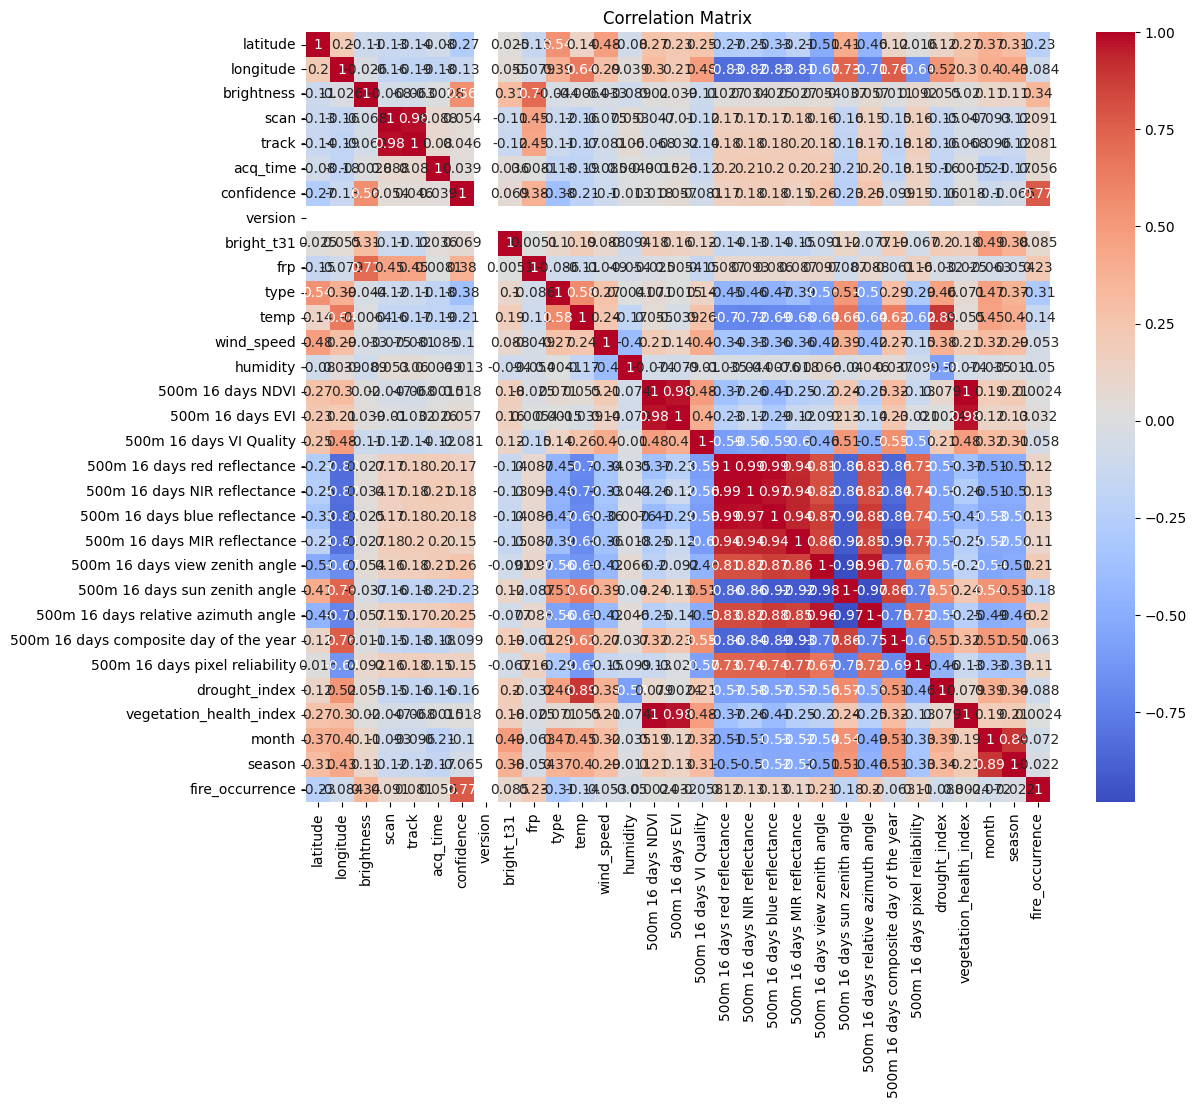

fire_occurrence                           1.000000
confidence                                0.767881
brightness                                0.342328
frp                                       0.225557
500m 16 days view zenith angle            0.209107
500m 16 days relative azimuth angle       0.196933
500m 16 days blue reflectance             0.133764
500m 16 days NIR reflectance              0.130175
500m 16 days red reflectance              0.122283
500m 16 days pixel reliability            0.112268
500m 16 days MIR reflectance              0.107817
scan                                      0.090999
bright_t31                                0.085373
track                                     0.081010
acq_time                                  0.056399
500m 16 days EVI                          0.031730
500m 16 days NDVI                         0.002382
vegetation_health_index                   0.002382
season                                   -0.022095
humidity                       

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


correlation_with_fire = corr_matrix['fire_occurrence'].sort_values(ascending=False)
print(correlation_with_fire)

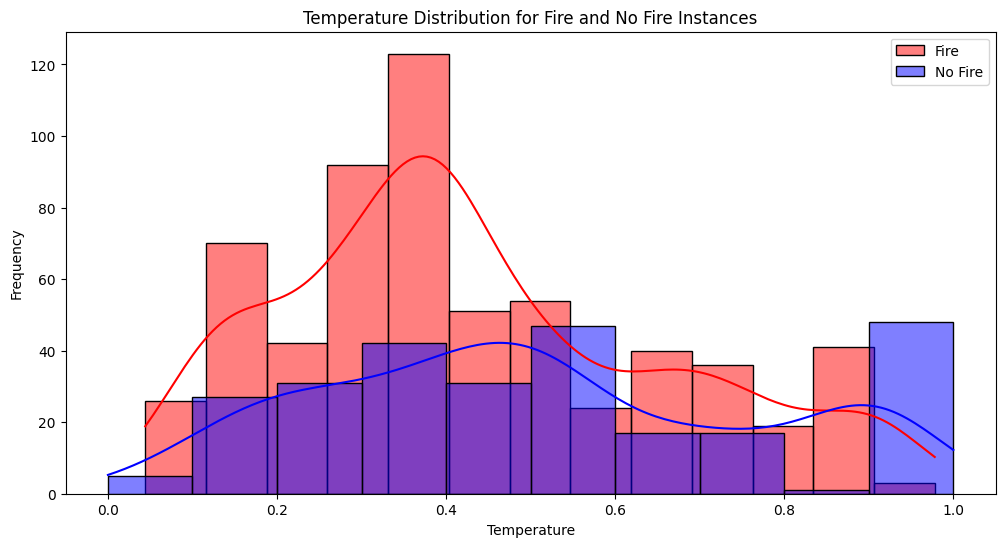

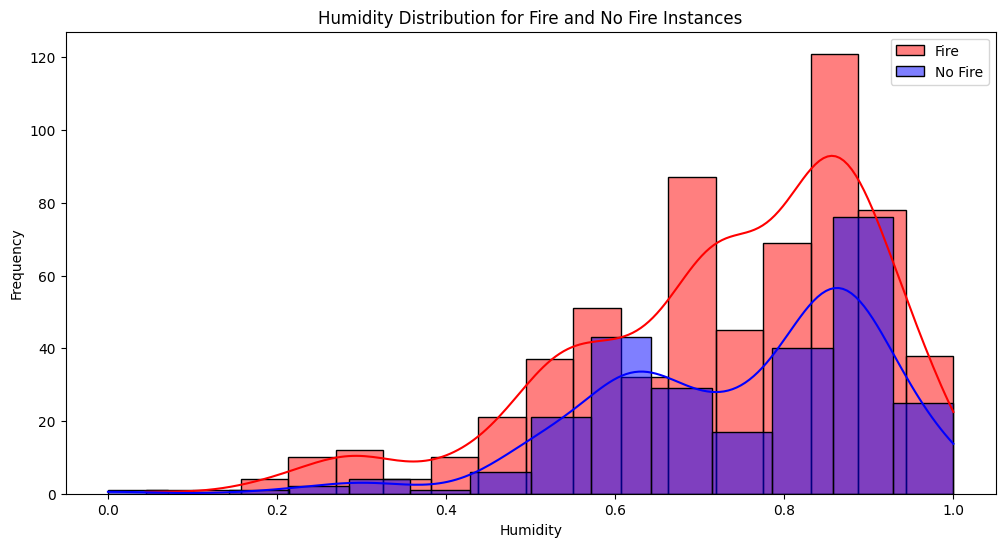

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.histplot(df[df['fire_occurrence'] == True]['temp'], color='red', label='Fire', kde=True)
sns.histplot(df[df['fire_occurrence'] == False]['temp'], color='blue', label='No Fire', kde=True)
plt.title('Temperature Distribution for Fire and No Fire Instances')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()


plt.figure(figsize=(12, 6))
sns.histplot(df[df['fire_occurrence'] == True]['humidity'], color='red', label='Fire', kde=True)
sns.histplot(df[df['fire_occurrence'] == False]['humidity'], color='blue', label='No Fire', kde=True)
plt.title('Humidity Distribution for Fire and No Fire Instances')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [18]:
df.dtypes

latitude                                         float64
longitude                                        float64
brightness                                       float64
scan                                             float64
track                                            float64
acq_date                                  datetime64[ns]
acq_time                                           int64
satellite                                         object
instrument                                        object
confidence                                         int64
version                                          float64
bright_t31                                       float64
frp                                              float64
daynight                                          object
type                                               int64
temp                                             float64
wind_speed                                       float64
description                    

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

X = df[['brightness', 'temp', 'humidity', 'wind_speed', '500m 16 days NDVI']]
y = df['fire_occurrence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

model_lr = LogisticRegression(random_state=42)

grid_search_lr = GridSearchCV(estimator=model_lr, param_grid=param_grid_lr, cv=5, scoring='accuracy')

grid_search_lr.fit(X_train_scaled, y_train)


print("Logistic Regression - Meilleurs paramètres:", grid_search_lr.best_params_)
print("Logistic Regression - Meilleur score de validation croisée:", grid_search_lr.best_score_)


best_lr_model = grid_search_lr.best_estimator_
y_pred_lr_tuned = best_lr_model.predict(X_test_scaled)


print("Logistic Regression (Optimisé) - Classification Report:")
print(classification_report(y_test, y_pred_lr_tuned))
print("Logistic Regression (Optimisé) - Accuracy:", accuracy_score(y_test, y_pred_lr_tuned))
print("Logistic Regression (Optimisé) - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr_tuned))


cv_scores_lr_tuned = cross_val_score(best_lr_model, X, y, cv=5)
print("Cross-validation scores (Optimisé):", cv_scores_lr_tuned)
print("Mean CV accuracy (Optimisé):", cv_scores_lr_tuned.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1194, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/us

Logistic Regression - Meilleurs paramètres: {'C': 100, 'penalty': 'l2'}
Logistic Regression - Meilleur score de validation croisée: 0.796774193548387
Logistic Regression (Optimisé) - Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.48      0.54        82
           1       0.79      0.87      0.83       185

    accuracy                           0.75       267
   macro avg       0.70      0.67      0.68       267
weighted avg       0.74      0.75      0.74       267

Logistic Regression (Optimisé) - Accuracy: 0.7490636704119851
Logistic Regression (Optimisé) - Confusion Matrix:
[[ 39  43]
 [ 24 161]]
Cross-validation scores (Optimisé): [0.71348315 0.79213483 0.70621469 0.81355932 0.6440678 ]
Mean CV accuracy (Optimisé): 0.733891957087539


In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV


X = df[['brightness', 'temp', 'humidity', 'wind_speed', '500m 16 days NDVI']]
y = df['fire_occurrence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid_dt = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


model_dt = DecisionTreeClassifier(random_state=42)

grid_search_dt = GridSearchCV(estimator=model_dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')

grid_search_dt.fit(X_train, y_train)

print("Decision Tree - Meilleurs paramètres:", grid_search_dt.best_params_)
print("Decision Tree - Meilleur score de validation croisée:", grid_search_dt.best_score_)


best_dt_model = grid_search_dt.best_estimator_
y_pred_dt_tuned = best_dt_model.predict(X_test)

print("Decision Tree (Optimisé) - Classification Report:")
print(classification_report(y_test, y_pred_dt_tuned))
print("Decision Tree (Optimisé) - Accuracy:", accuracy_score(y_test, y_pred_dt_tuned))
print("Decision Tree (Optimisé) - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt_tuned))

cv_scores_dt_tuned = cross_val_score(best_dt_model, X, y, cv=5)
print("Cross-validation scores (Optimisé):", cv_scores_dt_tuned)
print("Mean CV accuracy (Optimisé):", cv_scores_dt_tuned.mean())


Decision Tree - Meilleurs paramètres: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Decision Tree - Meilleur score de validation croisée: 0.7548387096774195
Decision Tree (Optimisé) - Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.60      0.58        82
           1       0.82      0.79      0.80       185

    accuracy                           0.73       267
   macro avg       0.69      0.69      0.69       267
weighted avg       0.74      0.73      0.73       267

Decision Tree (Optimisé) - Accuracy: 0.7303370786516854
Decision Tree (Optimisé) - Confusion Matrix:
[[ 49  33]
 [ 39 146]]
Cross-validation scores (Optimisé): [0.84831461 0.82022472 0.78531073 0.75706215 0.70056497]
Mean CV accuracy (Optimisé): 0.7822954357900083


In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

X = df[['brightness', 'temp', 'humidity', 'wind_speed', '500m 16 days NDVI']]
y = df['fire_occurrence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


model_rf = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=model_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')

grid_search_rf.fit(X_train, y_train)

print("Random Forest - Meilleurs paramètres:", grid_search_rf.best_params_)
print("Random Forest - Meilleur score de validation croisée:", grid_search_rf.best_score_)


best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)


print("Random Forest (Optimisé) - Classification Report:")
print(classification_report(y_test, y_pred_rf_tuned))
print("Random Forest (Optimisé) - Accuracy:", accuracy_score(y_test, y_pred_rf_tuned))
print("Random Forest (Optimisé) - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf_tuned))

cv_scores_rf_tuned = cross_val_score(best_rf_model, X, y, cv=5)
print("Cross-validation scores (Optimisé):", cv_scores_rf_tuned)
print("Mean CV accuracy (Optimisé):", cv_scores_rf_tuned.mean())


Random Forest - Meilleurs paramètres: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Random Forest - Meilleur score de validation croisée: 0.8258064516129033
Random Forest (Optimisé) - Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.59      0.69        82
           1       0.84      0.95      0.89       185

    accuracy                           0.84       267
   macro avg       0.83      0.77      0.79       267
weighted avg       0.83      0.84      0.83       267

Random Forest (Optimisé) - Accuracy: 0.8352059925093633
Random Forest (Optimisé) - Confusion Matrix:
[[ 48  34]
 [ 10 175]]
Cross-validation scores (Optimisé): [0.87078652 0.84269663 0.85310734 0.79661017 0.66101695]
Mean CV accuracy (Optimisé): 0.8048435218688503


In [23]:
import pickle
best_rf_model = grid_search_rf.best_estimator_

with open('model2.pkl', 'wb') as model_file:
    pickle.dump(best_rf_model, model_file)


In [21]:
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

X = df[['brightness', 'temp', 'humidity', 'wind_speed', '500m 16 days NDVI']]
y = df['fire_occurrence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid_xgb = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}


model_xgb = xgb.XGBClassifier(random_state=42)


grid_search_xgb = GridSearchCV(estimator=model_xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy')


grid_search_xgb.fit(X_train, y_train)


print("XGBoost - Meilleurs paramètres:", grid_search_xgb.best_params_)
print("XGBoost - Meilleur score de validation croisée:", grid_search_xgb.best_score_)


best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb_tuned = best_xgb_model.predict(X_test)

print("XGBoost (Optimisé) - Classification Report:")
print(classification_report(y_test, y_pred_xgb_tuned))
print("XGBoost (Optimisé) - Accuracy:", accuracy_score(y_test, y_pred_xgb_tuned))
print("XGBoost (Optimisé) - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb_tuned))

cv_scores_xgb_tuned = cross_val_score(best_xgb_model, X, y, cv=5)
print("Cross-validation scores (Optimisé):", cv_scores_xgb_tuned)
print("Mean CV accuracy (Optimisé):", cv_scores_xgb_tuned.mean())


XGBoost - Meilleurs paramètres: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
XGBoost - Meilleur score de validation croisée: 0.8241935483870968
XGBoost (Optimisé) - Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.38      0.54        82
           1       0.78      0.99      0.87       185

    accuracy                           0.80       267
   macro avg       0.86      0.68      0.71       267
weighted avg       0.83      0.80      0.77       267

XGBoost (Optimisé) - Accuracy: 0.8014981273408239
XGBoost (Optimisé) - Confusion Matrix:
[[ 31  51]
 [  2 183]]
Cross-validation scores (Optimisé): [0.87640449 0.83707865 0.84180791 0.8079096  0.66101695]
Mean CV accuracy (Optimisé): 0.8048435218688503


In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model_nn = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

history = model_nn.fit(X_train_scaled, y_train, epochs=250, batch_size=32, validation_split=0.2, verbose=1, class_weight=class_weights)


y_pred_nn = (model_nn.predict(X_test_scaled) > 0.5).astype("int32")

print("Neural Network:")
print(classification_report(y_test, y_pred_nn))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nn))

loss, accuracy = model_nn.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/250
16/16 [==============================] - 3s 28ms/step - loss: 1.0859 - accuracy: 0.5161 - val_loss: 0.6796 - val_accuracy: 0.6129
Epoch 2/250
16/16 [==============================] - 0s 7ms/step - loss: 0.9815 - accuracy: 0.5040 - val_loss: 0.6813 - val_accuracy: 0.5323
Epoch 3/250
16/16 [==============================] - 0s 8ms/step - loss: 0.8645 - accuracy: 0.5544 - val_loss: 0.6805 - val_accuracy: 0.5081
Epoch 4/250
16/16 [==============================] - 0s 7ms/step - loss: 0.8248 - accuracy: 0.5645 - val_loss: 0.6770 - val_accuracy: 0.5081
Epoch 5/250
16/16 [==============================] - 0s 6ms/step - loss: 0.6993 - accuracy: 0.5948 - val_loss: 0.6711 - val_accuracy: 0.5484
Epoch 6/250
16/16 [==============================] - 0s 4ms/step - loss: 0.7477 - accuracy: 0.6250 - val_loss: 0.6662 - val_accuracy: 0.5565
Epoch 7/250
16/16 [==============================] - 0s 5ms/step - loss: 0.7261 - accuracy: 0.5948 - val_loss: 0.6544 - val_accuracy: 0.6129
Epoch 8/250
